In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
d = pd.read_csv('KuznetsovData.txt', sep = '\t', decimal = ',')
d = d.astype('float')
y = d["y"]
x1 = d["x1"]
x2 = d["x2"]
x3 = d["x3"]
d

,y,x1,x2,x3
1,207.739615,193.858622,32.945006,46.266501
2,208.608039,195.067517,33.326544,44.862495
3,209.153049,195.489974,33.249550,47.085830
4,209.628554,194.642511,33.106918,45.446533
5,206.949373,194.237703,34.637592,48.151849
...,...,...,...,...
296,211.790127,197.081133,34.034027,45.774430
297,210.405819,196.948563,35.465902,46.050843
298,210.831919,196.719325,35.671481,46.002748
299,210.886958,196.721007,34.482185,45.979173


# Отбираем x для парной модели

In [4]:
from matplotlib import pyplot as plt
import numpy as np

### y и x1

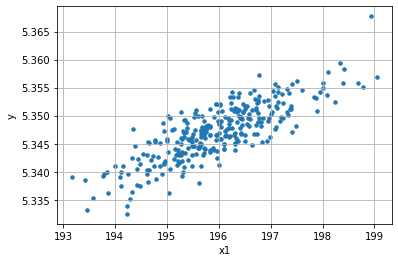

In [5]:
xs = d["x1"]
ys = d["y"].apply( np.log )
pd.DataFrame(np.array([xs,ys]).T).plot.scatter(0, 1, s=12, grid=True)
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

In [6]:
x1_corr = np.corrcoef(d["x1"], d["y"])[0, 1]
x1_corr

0.817827763773581

### y и x2

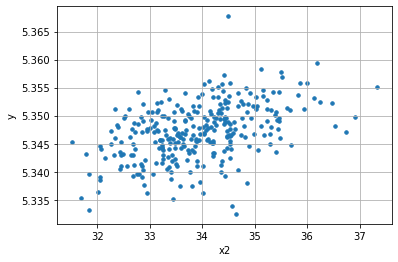

In [7]:
xs = d["x2"]
ys = d["y"].apply( np.log )
pd.DataFrame(np.array([xs,ys]).T).plot.scatter(0, 1, s=12, grid=True)
plt.xlabel('x2')
plt.ylabel('y')
plt.show()

In [8]:
x2_corr = np.corrcoef(d["x2"], d["y"])[0, 1]
x2_corr

0.4439459604344157

### y и x3

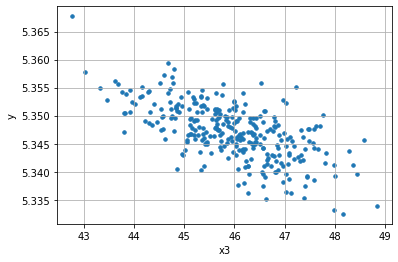

In [9]:
xs = d["x3"]
ys = d["y"].apply( np.log )
pd.DataFrame(np.array([xs,ys]).T).plot.scatter(0, 1, s=12, grid=True)
plt.xlabel('x3')
plt.ylabel('y')
plt.show()

In [10]:
x3_corr = np.corrcoef(d["x3"], d["y"])[0, 1]
x3_corr

-0.6331627032800972

**Вывод**<br>Наиболее сильная зависимость видна между y и x1. Ее же и берем для построения парной регрессии

In [11]:
import statsmodels.formula.api as sm

# Строим парную модель

In [12]:
m_pair = sm.ols(formula="y ~ x1", data=d)
results_pair = m_pair.fit()
s_pair = results_pair.summary()

df_pair = pd.read_html(s_pair.tables[1].as_html(),header=0,index_col=0)[0]
s_pair

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     601.9
Date:                Sat, 27 Nov 2021   Prob (F-statistic):           1.72e-73
Time:                        10:31:47   Log-Likelihood:                -274.30
No. Observations:                 300   AIC:                             552.6
Df Residuals:                     298   BIC:                             560.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     47.9367      6.606      7.256      0.000      34.936      60.938
x1             0.8271      0.034     24.533      0.000       0.761       0.893
==============================================================================
Omnibus:                        0.143   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.931   Jarque-Bera (JB):                0.231
Skew:                           0.046   Prob(JB):                        0.891
Kurtosis:                       2.899   Cond. No.                     3.70e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Доверительные интервалы

In [13]:
results_pair.conf_int(0.05)

,0,1
Intercept,34.935764,60.937721
x1,0.760738,0.893430


### Коэфф детерминации R^2

In [14]:
pred_val0 = results_pair.fittedvalues.copy()
true_val0 = d["y"]
e0 = true_val0 - pred_val0

In [15]:
print(results_pair.rsquared)

0.6688422511988963


### Коэфф апроксимации

In [16]:
A_pair = (1/len(x1))*sum(abs(e0/y))*100
print(A_pair)

0.233163681453908


### Стандартная ошибка

In [17]:
results_pair.HC0_se

Intercept    7.194731
x1           0.036711
dtype: float64

### Средняя ошибка модели

In [18]:
print(np.sqrt(results_pair.scale))

0.6057627094313864


### Средняя относительная ошибка апроксимации

In [19]:
from sklearn.metrics import mean_absolute_error
mape = mean_absolute_error(true_val0, pred_val0) / true_val0.abs().sum()
mape

7.771833701318814e-06

In [20]:
import seaborn as sns

<AxesSubplot:xlabel='real', ylabel='pred'>

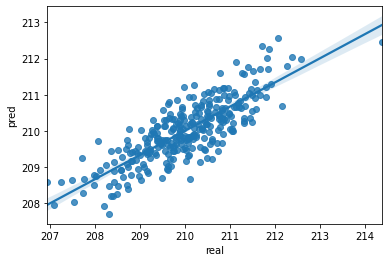

In [21]:
pred0 =pd.DataFrame({
    'real': true_val0,
    'pred': pred_val0
})
sns.regplot(x='real',y='pred',data=pred0)

### Определяем коэффициенты

#### x1

In [22]:
beta_pair_1 = df_pair['coef'].values[1] # Бета коэффициент для x1
delta_pair_1 = x1_corr * beta_pair_1 / results_pair.rsquared # Дельта коэффициент для x1
elastic_pair_1 = beta_pair_1 * x1.mean() / y.mean() # Коэффициент эластичности для x1

In [23]:
print("Beta: {}\nDelta: {}\nElastic: {}".format(beta_pair_1,delta_pair_1,elastic_pair_1))

Beta: 0.8271
Delta: 1.0113376393381845
Elastic: 0.7717537559994294


#### Проводим тесты

In [24]:
import statsmodels.stats as smd

In [25]:
import statsmodels.stats.api as sms

In [26]:
from statsmodels.compat import lzip

In [27]:
residuals = results_pair.resid

#### Тест Дарбина-Ватсона

In [28]:
#DWtest
dw = smd.stattools.durbin_watson(residuals)
dw

2.0819401426055157

#### Тест Бреуша-Годфри

In [29]:
#BGtest
name=['Критерий хи-квадрат','P-значение', 'F статистика','P-значение(F)']
bg=sms.acorr_breusch_godfrey(results_pair,nlags=1)
lzip(name,bg)

[('Критерий хи-квадрат', 0.5810120687365194),
 ('P-значение', 0.44591589552190347),
 ('F статистика', 0.5763181073017443),
 ('P-значение(F)', 0.4483612191039723)]

#### Тест Голдфельда-Квандта

In [30]:
#GQtest
name=['F-статистика','P-значение']
gq=sms.het_goldfeldquandt(residuals,results_pair.model.exog)
print(lzip(name,gq))

[('F-статистика', 0.8441350689555344), ('P-значение', 0.8481020152414865)]


#### Тест Бреуша-Пагана

In [31]:
#BPtest
name=['BP','P-значение']
bp=sms.het_breuschpagan(residuals,results_pair.model.exog)
lzip(name,bp)


[('BP', 0.10841978338382852), ('P-значение', 0.7419504119015491)]

#### Тест Уайта

In [32]:
#White_test
name=['WT','P-значение']
wt=sms.het_white(residuals,results_pair.model.exog)
lzip(name,wt)

[('WT', 2.9348561573732), ('P-значение', 0.230517596548094)]

# Строим множественную модель

#### Общие данные

In [33]:
m_many = sm.ols(formula="y ~ x1 + x2 + x3", data=d)
results_many = m_many.fit()
s_many = results_many.summary()

df_many = pd.read_html(s_many.tables[1].as_html(),header=0,index_col=0)[0]
s_many

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     342.9
Date:                Sat, 27 Nov 2021   Prob (F-statistic):           5.83e-96
Time:                        10:32:06   Log-Likelihood:                -215.29
No. Observations:                 300   AIC:                             438.6
Df Residuals:                     296   BIC:                             453.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.5966      8.711      8.105      0.000      53.454      87.739
x1             0.8113      0.045     17.890      0.000       0.722       0.901
x2            -0.1703      0.042     -4.052      0.000      -0.253      -0.088
x3            -0.3004      0.031     -9.614      0.000      -0.362      -0.239
==============================================================================
Omnibus:                        1.197   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.550   Jarque-Bera (JB):                1.281
Skew:                           0.145   Prob(JB):                        0.527
Kurtosis:                       2.863   Cond. No.                     6.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Доверительные интервалы

In [34]:
results_many.conf_int(0.05)

,0,1
Intercept,53.453662,87.739496
x1,0.722086,0.900586
x2,-0.253002,-0.087593
x3,-0.361898,-0.238915


### Коэфф детерминации R^2

In [35]:
pred_val0 = results_many.fittedvalues.copy()
true_val0 = d["y"]
e0 = true_val0 - pred_val0

In [36]:
print(results_many.rsquared)

0.7765415367797509


### Коэфф апроксимации

In [37]:
A_many = (1/len(x1))*sum(abs(e0/y))*100
print(A_many)

0.18954269189509343


### Стандартная ошибка

In [38]:
results_many.HC0_se

Intercept    8.934708
x1           0.047569
x2           0.043938
x3           0.030626
dtype: float64

### Средняя ошибка модели

In [39]:
print(np.sqrt(results_many.scale))

0.49928182189515646


### Средняя относительная ошибка апроксимации

In [40]:
from sklearn.metrics import mean_absolute_error
mape = mean_absolute_error(true_val0, pred_val0) / true_val0.abs().sum()
mape

6.31650461413809e-06

In [41]:
import seaborn as sns

<AxesSubplot:xlabel='real', ylabel='pred'>

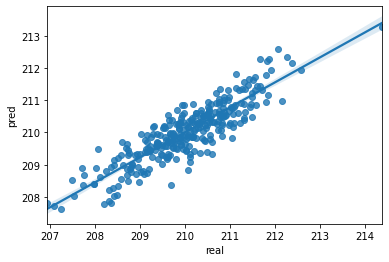

In [42]:
pred0 =pd.DataFrame({
    'real': true_val0,
    'pred': pred_val0
})
sns.regplot(x='real',y='pred',data=pred0)

### Определяем коэффициенты

#### x1

In [43]:
beta_many_1 = df_many['coef'].values[1] # Бета коэффициент для x1
delta_many_1 = x1_corr * beta_many_1 / results_many.rsquared # Дельта коэффициент для x1
elastic_many_1 = beta_many_1 * x1.mean() / y.mean() # Коэффициент эластичности для x1

In [44]:
print("Beta: {}\nDelta: {}\nElastic: {}".format(beta_many_1,delta_many_1,elastic_many_1))

Beta: 0.8113
Delta: 0.8544342231852752
Elastic: 0.7570110291891393


#### x2

In [45]:
beta_many_2 = df_many['coef'].values[2] # Бета коэффициент для x2
delta_many_2 = x2_corr * beta_many_2 / results_many.rsquared # Дельта коэффициент для x2
elastic_many_2 = beta_many_2 * x2.mean() / y.mean() # Коэффициент эластичности для x2


In [46]:
print("Beta: {}\nDelta: {}\nElastic: {}".format(beta_many_2,delta_many_2,elastic_many_2))

Beta: -0.1703
Delta: -0.09735988801771517
Elastic: -0.027503073659420153


#### x3

In [47]:
beta_many_3 = df_many['coef'].values[3] # Бета коэффициент для x3
delta_many_3 = x3_corr * beta_many_3 / results_many.rsquared # Дельта коэффициент для x3
elastic_many_3 = beta_many_3 * x3.mean() / y.mean() # Коэффициент эластичности для x3

In [48]:
print("Beta: {}\nDelta: {}\nElastic: {}".format(beta_many_3,delta_many_3,elastic_many_3))

Beta: -0.3004
Delta: 0.244934838713319
Elastic: -0.06570128614987222


#### Проводим тесты

In [131]:
import statsmodels.stats as smd

In [132]:
import statsmodels.stats.api as sms

In [133]:
from statsmodels.compat import lzip

In [134]:
residuals = results_many.resid

#### Тест Дарбина-Ватсона

In [135]:
#DWtest
dw = smd.stattools.durbin_watson(residuals)
dw

1.9935075478324629

#### Тест Бреуша-Годфри

In [136]:
#BGtest
name=['Критерий хи-квадрат','P-значение', 'F статистика','P-значение(F)']
bg=sms.acorr_breusch_godfrey(results_many,nlags=1)
lzip(name,bg)

[('Критерий хи-квадрат', 6.84183937171845e-05),
 ('P-значение', 0.9934003402440321),
 ('F статистика', 6.727810250051102e-05),
 ('P-значение(F)', 0.9934611105218694)]

#### Тест Голдфельда-Квандта

In [137]:
#GQtest
name=['F-статистика','P-значение']
gq=sms.het_goldfeldquandt(residuals,results_many.model.exog)
print(lzip(name,gq))

[('F-статистика', 0.9570440996057983), ('P-значение', 0.6044157328928486)]


#### Тест Бреуша-Пагана

In [138]:
#BPtest
name=['BP','P-значение']
bp=sms.het_breuschpagan(residuals,results_many.model.exog)
lzip(name,bp)


[('BP', 7.384346801324837), ('P-значение', 0.060605738848305696)]

#### Тест Уайта

In [139]:
#White_test
name=['WT','P-значение']
wt=sms.het_white(residuals,results_many.model.exog)
lzip(name,wt)

[('WT', 10.967645333892895), ('P-значение', 0.27793321069133387)]

# Сравниваем модели

In [140]:
error_pair = np.sqrt(results_pair.scale)
error_many = np.sqrt(results_many.scale)

In [141]:
determ = (results_pair.rsquared, results_many.rsquared)
print(determ)

(0.6688422511988963, 0.7765415367797509)


In [142]:
adjust_determ = (results_pair.rsquared_adj, results_many.rsquared_adj)
print(adjust_determ)

(0.6677309835854697, 0.774276755057924)


In [143]:
st_error = (error_pair, error_many)
print(st_error)

(0.6057627094313864, 0.49928182189515646)


In [144]:
approx = (A_pair, A_many)
print(approx)

(0.233163681453908, 0.18954269189509343)


In [145]:
f_test = (601.9,342.9)
print(f_test)

(601.9, 342.9)


### Выигрывает множественная модель по 4 из 5 пунктов